# Support Vector Machine Classification
> https://scikit-learn.org/stable/modules/svm.html

## Setup

### Environment

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Load the dataset iris

In [24]:
iris = datasets.load_iris()

In [25]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df = df[df['Species'] !=0]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  100 non-null    float64
 1   Sepal width   100 non-null    float64
 2   Petal length  100 non-null    float64
 3   Petal width   100 non-null    float64
 4   Species       100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


### A simple visualization

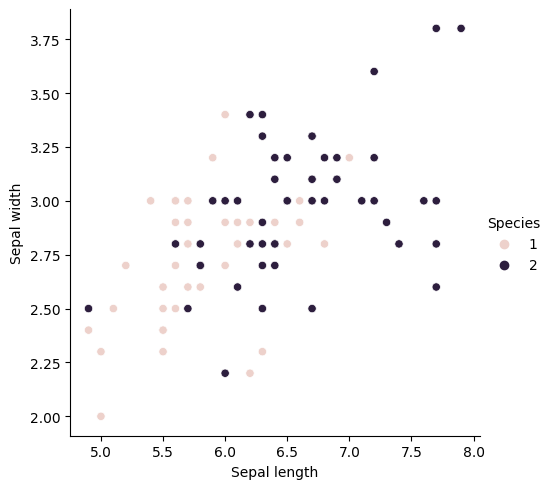

In [28]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

### Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:2]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [30]:
X_train[:5]

,Sepal length,Sepal width
131,7.9,3.8
86,6.7,3.1
64,5.6,2.9
138,6.0,3.0
94,5.6,2.7


## Train your model

In [31]:
from sklearn import svm

model = svm.SVC(kernel='linear')
classifier = model.fit(X_train, y_train)

## Evaluate your model

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[11  1]
 [ 1  7]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

0.9
